In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns", None)
data_test = pd.read_csv("D:/ML/ml_lab3/test.csv")
data_train = pd.read_csv("D:/ML/ml_lab3/train.csv")

# Розміри train та test датасетів

In [2]:
print("Test shape:", data_test.shape)
print("Train shape:", data_train.shape)

Test shape: (418, 11)
Train shape: (891, 12)


# Приклад train-датасету

In [3]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.0,0,1,3101298,12.2875,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C


# Типи даних

In [4]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Пошук дублікатів

In [6]:
data_train[data_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
data_test[data_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
numeric_columns_index = data_train.select_dtypes([np.number]).columns

numerical_features_overview = [x for x in list(numeric_columns_index)]
numerical_features_overview

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [9]:
categorical_columns_index = data_train.select_dtypes([np.object]).columns

categorical_features_overview = [x for x in list(categorical_columns_index)]
categorical_features_overview

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

# Відсутні значення у відсотковому співвідношенні

In [10]:
def missing_values_percentage(data):
    nulled_values = data.isnull()
    total_missed = nulled_values.sum().sort_values(ascending=False)
    percent_missed = (nulled_values.sum()/nulled_values.count()*100).sort_values(ascending=False)

    total_percent_missed_train = pd.concat([total_missed, percent_missed], axis=1,
                                      keys=["Total amount", "Percent missed"])

    print(total_percent_missed_train)

In [11]:
missing_values_percentage(data_train)

             Total amount  Percent missed
Cabin                 687       77.104377
Age                   177       19.865320
Embarked                2        0.224467
Fare                    0        0.000000
Ticket                  0        0.000000
Parch                   0        0.000000
SibSp                   0        0.000000
Sex                     0        0.000000
Name                    0        0.000000
Pclass                  0        0.000000
Survived                0        0.000000
PassengerId             0        0.000000


In [12]:
missing_values_percentage(data_test)

             Total amount  Percent missed
Cabin                 327       78.229665
Age                    86       20.574163
Fare                    1        0.239234
Embarked                0        0.000000
Ticket                  0        0.000000
Parch                   0        0.000000
SibSp                   0        0.000000
Sex                     0        0.000000
Name                    0        0.000000
Pclass                  0        0.000000
PassengerId             0        0.000000


# Унікальні категоріальні значення

In [13]:
data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [14]:
data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0)

Name        418
Sex           2
Ticket      363
Cabin        76
Embarked      3
dtype: int64

# Розподіли

In [15]:
data_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Long, Mr. Milton Clyde",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


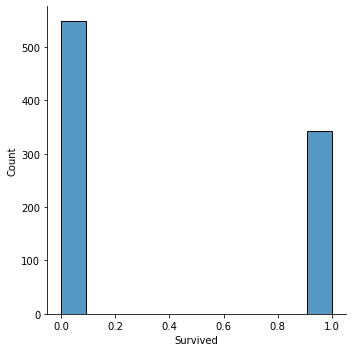

In [16]:
sns.displot(data_train["Survived"], kde=False)

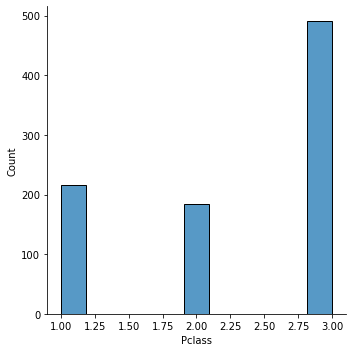

In [17]:
sns.displot(data_train["Pclass"], kde=False)

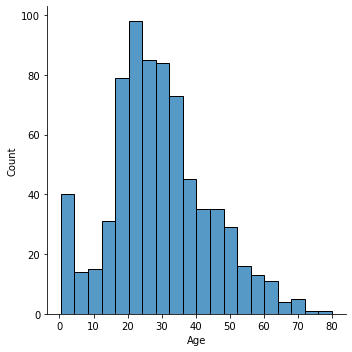

In [18]:
sns.displot(data_train["Age"], kde=False)

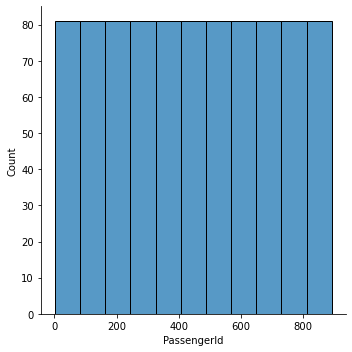

In [19]:
sns.displot(data_train["PassengerId"], kde=False)

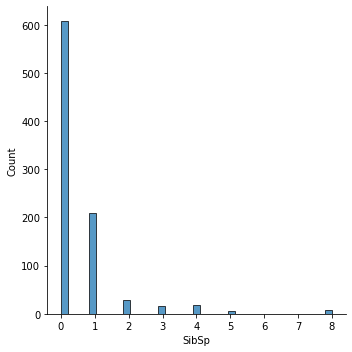

In [20]:
sns.displot(data_train["SibSp"], kde=False)

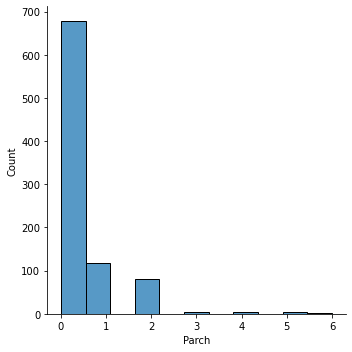

In [21]:
sns.displot(data_train["Parch"], kde=False)

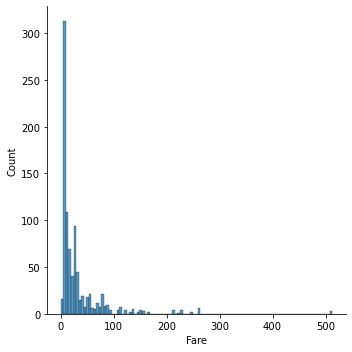

In [22]:
sns.displot(data_train["Fare"], kde=False)

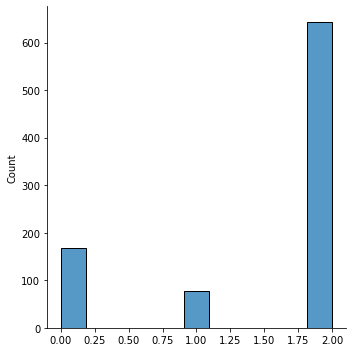

In [23]:
# 0 - C
# 1 - Q
# 2 - S
embarked_temp = data_train["Embarked"].copy().astype("category").cat.codes
sns.displot(embarked_temp[embarked_temp >= 0], kde=False)

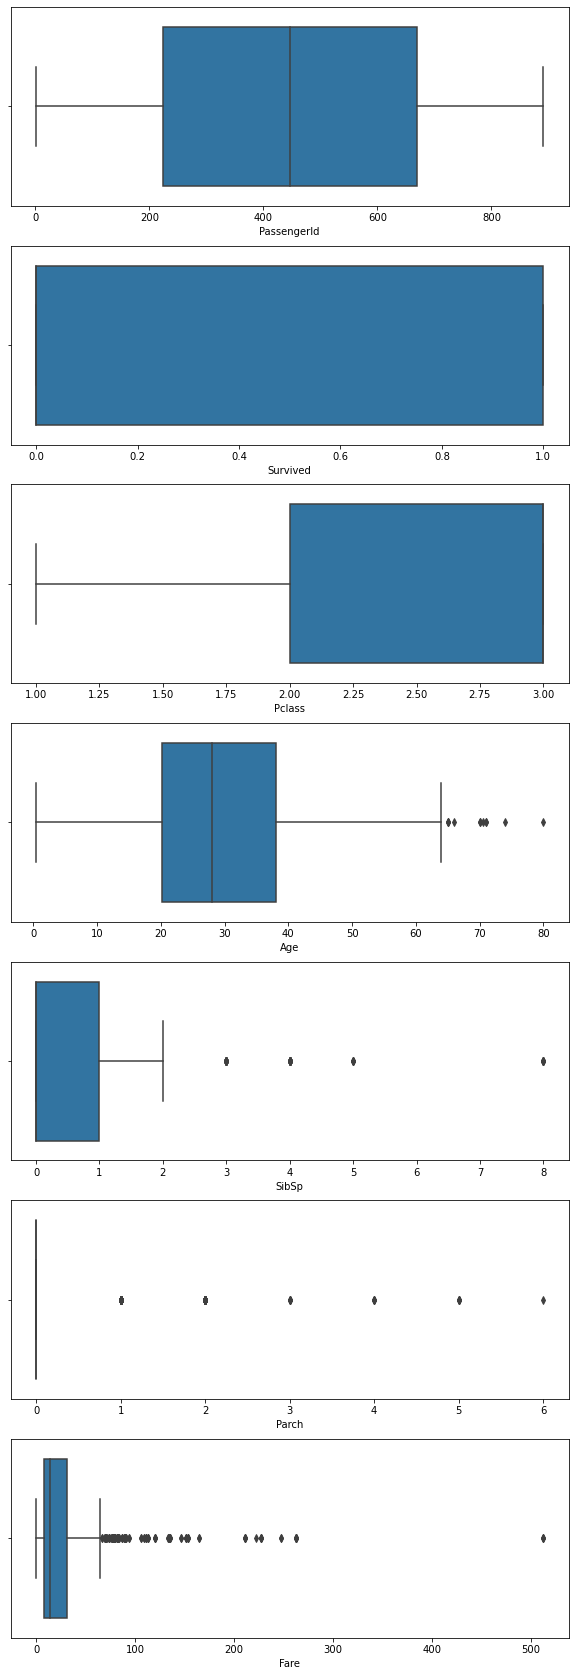

In [24]:
fig, axes = plt.subplots(nrows=len(numerical_features_overview), ncols=1)
fig.set_size_inches(10,30)
for i, col in enumerate(numerical_features_overview):
    sns.boxplot(x=data_train[col], ax=axes[i])
plt.show()

# Попередня обробка даних

In [25]:
data_test = pd.read_csv("D:/ML/ml_lab3/test.csv")
data_train = pd.read_csv("D:/ML/ml_lab3/train.csv") 

prepared_data_test = data_test
prepared_data_train = data_train

prepared_data_train.drop(columns={"PassengerId","Ticket","Cabin"},inplace=True)
prepared_data_test.drop(columns={"PassengerId","Ticket","Cabin"},inplace=True)

In [26]:
prepared_data_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
364,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,15.5000,Q
358,1,3,"McGovern, Miss. Mary",female,NaN,0,0,7.8792,Q
619,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,10.5000,S
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q
113,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,9.8250,S
410,0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,7.8958,S
652,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8.4333,S
838,1,3,"Chip, Mr. Chang",male,32.0,0,0,56.4958,S
332,0,1,"Graham, Mr. George Edward",male,38.0,0,1,153.4625,S
222,0,3,"Green, Mr. George Henry",male,51.0,0,0,8.0500,S


In [27]:
prepared_data_train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [28]:
categorical_features = ["Name", "Embarked", "Sex", "SibSp", "Parch"]
numerical_features = ["Age", "Fare"]

In [29]:
selected_features =  numerical_features + categorical_features

In [30]:
def extract_prefixes(data):
    prefixes = {
    "Capt": "Сrew",
    "Col": "Сrew",
    "Major": "Сrew",
    "Jonkheer": "VIP",
    "Don": "VIP",
    "Sir" : "VIP",
    "Dr": "Сrew",
    "Rev": "Сrew",
    "the Countess":"VIP",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "VIP"
    }
    
    for i in range(len(data)):
        cur_name = data[i]
        
        for prefix in prefixes.keys():
            if prefix in cur_name:
                cur_name = prefixes[prefix]
                break
                
        data[i] = cur_name
        
    return data

In [31]:
def uniques(column):
    uniques_set = set()
    for val in column:
        uniques_set.add(val)
            
    return uniques_set

In [32]:
# extract prefixes
prepared_data_train["Name"] = extract_prefixes(prepared_data_train["Name"])
prepared_data_test["Name"] = extract_prefixes(prepared_data_test["Name"])

print(prepared_data_test.shape)
print(prepared_data_train.shape)
print(prepared_data_test.select_dtypes("object").apply(pd.Series.nunique, axis=0))
print(prepared_data_train.select_dtypes("object").apply(pd.Series.nunique, axis=0))

(418, 8)
(891, 9)
Name        5
Sex         2
Embarked    3
dtype: int64
Name        6
Sex         2
Embarked    3
dtype: int64


In [33]:
TARGET = prepared_data_train["Survived"]
prepared_data_train = prepared_data_train.drop("Survived",axis=1)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numerical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ]
)

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)


prepr = ColumnTransformer(
     transformers = [
         ('numerical', numerical_transformer, numerical_features),
         ('categorical', categorical_transformer, categorical_features)
     ]
)

In [35]:
def transform(data):
    prepr.fit(data)
    return prepr.transform(data)

train_x = transform(prepared_data_train)
test_x = transform(prepared_data_test)

train_y = TARGET

print(f"trainX:",train_x.shape)
print(f"testX:",test_x.shape)

print(f"trainY:",train_y.shape)
print()

trainX: (891, 28)
testX: (418, 27)
trainY: (891,)



In [36]:
ALL_DATA = prepared_data_test.append(prepared_data_train)
ALL_DATA.shape

ALL_X = transform(ALL_DATA)

# Моделювання

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

train_split_x, validate_x, train_split_y, validate_y =train_test_split(train_x, train_y, test_size=0.2)
print(f"Train: {train_split_x.shape}, {train_split_y.shape}")
print(f"Validation: {validate_x.shape}, {validate_y.shape}")

Train: (712, 28), (712,)
Validation: (179, 28), (179,)


# Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(train_split_x, train_split_y)

train_preds = lr.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = lr.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.8118768095989053
Validation ROC_AUC: 0.7877470355731225


# RandomForestClassifier

In [39]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(train_split_x, train_split_y)

train_preds = clf.predict(train_split_x)
print(f"Train ROC_AUC: {roc_auc_score(train_split_y, train_preds)}")
test_preds = clf.predict(validate_x)
print(f"Validation ROC_AUC: {roc_auc_score(validate_y, test_preds)}")

Train ROC_AUC: 0.9205987634233648
Validation ROC_AUC: 0.7687088274044797


# Dimensionality reduction

In [40]:
from sklearn.preprocessing import LabelEncoder

def plot_cluster(data, labels):
    plt.scatter(data[:,0],data[:,1], c=labels, cmap='rainbow')

from sklearn.manifold import TSNE
train_x_clust = train_x
test_x_clust = test_x

prepared_data_train["Survived"]  = data_train["Survived"]

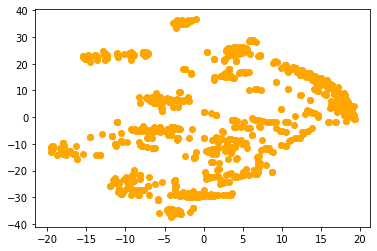

In [41]:
perplexity_tsne = 45

tsne = TSNE(perplexity=perplexity_tsne, n_iter=5000, random_state=30)

tsne_representation = tsne.fit_transform(train_x_clust)

plot_cluster(tsne_representation, "orange")

# K-means

In [42]:
from sklearn.cluster import KMeans

def kmeans(folded_repr, clusters, return_preds=False):
    kmeans = KMeans(algorithm='elkan', init='k-means++', max_iter=1000,
    n_clusters=clusters,
    random_state=None, verbose=0)
    labels = kmeans.fit(folded_repr).labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return kmeans.fit_predict(folded_repr)

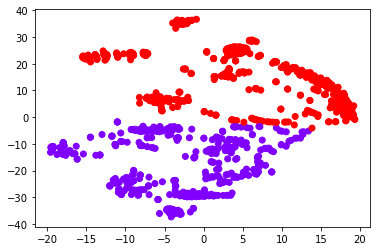

In [43]:
predictions = kmeans(tsne_representation,2, True)
prepared_data_train["pred"] = predictions

In [44]:
prepared_data_train[prepared_data_train["pred"] == 1].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,pred
712,1,Mr,male,48.0,1,0,52.0000,S,1,1
272,2,Mr,female,41.0,0,1,19.5000,S,1,1
137,1,Mr,male,37.0,1,0,53.1000,S,0,1
451,3,Mr,male,NaN,1,0,19.9667,S,0,1
337,1,Miss,female,41.0,0,0,134.5000,C,1,1
874,2,Mr,female,28.0,1,0,24.0000,C,1,1
261,3,Master,male,3.0,4,2,31.3875,S,1,1
93,3,Mr,male,26.0,1,2,20.5750,S,0,1
22,3,Miss,female,15.0,0,0,8.0292,Q,1,1
657,3,Mr,female,32.0,1,1,15.5000,Q,0,1


In [45]:
prepared_data_train[prepared_data_train["pred"] == 0].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,pred
662,1,Сrew,male,47.0,0,0,25.5875,S,0,0
507,1,Mr,male,NaN,0,0,26.5500,S,1,0
607,1,Mr,male,27.0,0,0,30.5000,S,1,0
391,3,Mr,male,21.0,0,0,7.7958,S,1,0
414,3,Mr,male,44.0,0,0,7.9250,S,1,0
878,3,Mr,male,NaN,0,0,7.8958,S,0,0
812,2,Mr,male,35.0,0,0,10.5000,S,0,0
588,3,Mr,male,22.0,0,0,8.0500,S,0,0
265,2,Mr,male,36.0,0,0,10.5000,S,0,0
695,2,Mr,male,52.0,0,0,13.5000,S,0,0


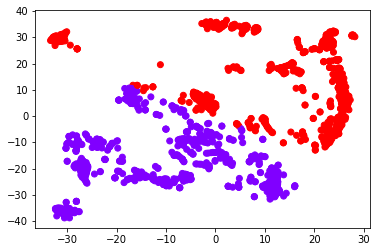

In [46]:
tnse_all_x_repr = tsne.fit_transform(ALL_X)
kmeans(tnse_all_x_repr,2)

# Agglomerative clustering

In [47]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative(folded_repr, link, clusters, return_preds=False):
    cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', linkage=link)
    cluster.fit(folded_repr)
    labels = cluster.labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return cluster.fit_predict(folded_repr)

# Single linkage

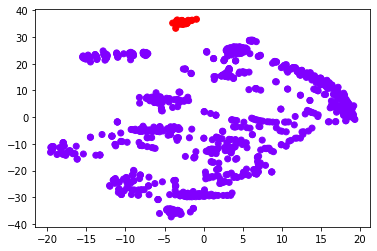

In [48]:
predictions = agglomerative(tsne_representation, "single", 2, True)
prepared_data_train["pred"] = predictions

In [49]:
prepared_data_train[prepared_data_train["pred"] == 1]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,pred
5,3,Mr,male,NaN,0,0,8.4583,Q,0,1
126,3,Mr,male,NaN,0,0,7.7500,Q,0,1
143,3,Mr,male,19.0,0,0,6.7500,Q,0,1
196,3,Mr,male,NaN,0,0,7.7500,Q,0,1
260,3,Mr,male,NaN,0,0,7.7500,Q,0,1
301,3,Mr,male,NaN,2,0,23.2500,Q,1,1
388,3,Mr,male,NaN,0,0,7.7292,Q,0,1
411,3,Mr,male,NaN,0,0,6.8583,Q,0,1
421,3,Mr,male,21.0,0,0,7.7333,Q,0,1
428,3,Mr,male,NaN,0,0,7.7500,Q,0,1


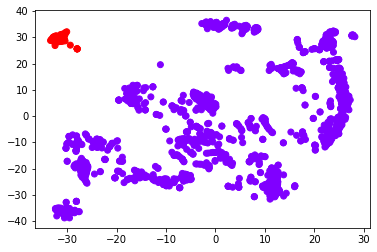

In [50]:
agglomerative(tnse_all_x_repr, "single",2)

# Complete linkage

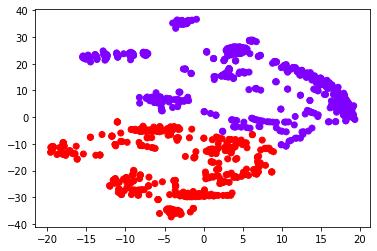

In [51]:
agglomerative(tsne_representation, "complete",2)

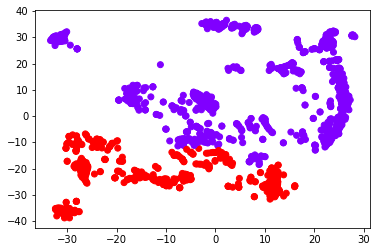

In [52]:
agglomerative(tnse_all_x_repr, "complete",2)

# Average linkage

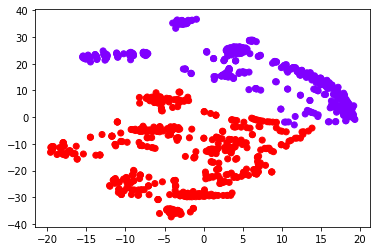

In [53]:
agglomerative(tsne_representation, "average", 2)

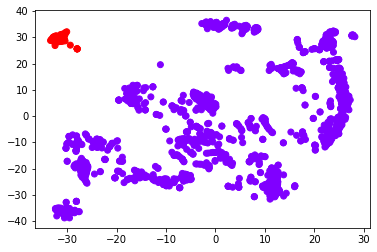

In [54]:
agglomerative(tnse_all_x_repr, "average",2)

# Ward's method

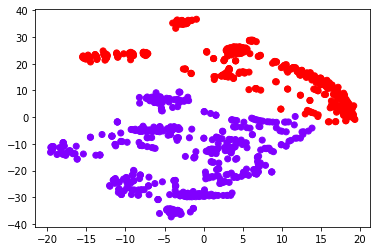

In [55]:
predictions = agglomerative(tsne_representation, "ward", 2, True)
prepared_data_train["pred"] = predictions

In [56]:
prepared_data_train.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,pred
486,1,Mr,female,35.0,1,0,90.0000,S,1,0
463,2,Mr,male,48.0,0,0,13.0000,S,0,1
8,3,Mr,female,27.0,0,2,11.1333,S,1,0
790,3,Mr,male,NaN,0,0,7.7500,Q,0,1
551,2,Mr,male,27.0,0,0,26.0000,S,0,1
35,1,Mr,male,42.0,1,0,52.0000,S,0,0
387,2,Miss,female,36.0,0,0,13.0000,S,1,0
265,2,Mr,male,36.0,0,0,10.5000,S,0,1
709,3,Master,male,NaN,1,1,15.2458,C,1,0
552,3,Mr,male,NaN,0,0,7.8292,Q,0,1


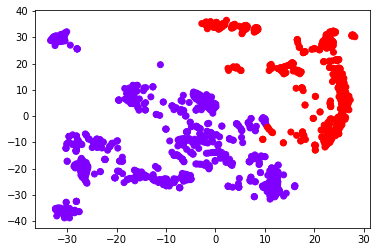

In [57]:
agglomerative(tnse_all_x_repr, "ward", 2)

# DBSCAN

In [58]:
from sklearn.cluster import DBSCAN

def dbscan(folded_repr, eps_, return_preds=False):
    # eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
    db = DBSCAN(eps=eps_, min_samples=2)
    db.fit(folded_repr)
    labels = db.labels_
    plot_cluster(folded_repr, labels)
    
    if return_preds:
        return db.fit_predict(folded_repr)

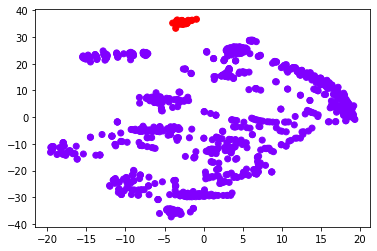

In [64]:
predictions = dbscan(tsne_representation,8,True)
prepared_data_train["pred"] = predictions

In [65]:
prepared_data_train[prepared_data_train["pred"] == 1].sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,pred
825,3,Mr,male,NaN,0,0,6.9500,Q,0,1
828,3,Mr,male,NaN,0,0,7.7500,Q,1,1
301,3,Mr,male,NaN,2,0,23.2500,Q,1,1
776,3,Mr,male,NaN,0,0,7.7500,Q,0,1
525,3,Mr,male,40.5,0,0,7.7500,Q,0,1
629,3,Mr,male,NaN,0,0,7.7333,Q,0,1
5,3,Mr,male,NaN,0,0,8.4583,Q,0,1
613,3,Mr,male,NaN,0,0,7.7500,Q,0,1
411,3,Mr,male,NaN,0,0,6.8583,Q,0,1
718,3,Mr,male,NaN,0,0,15.5000,Q,0,1


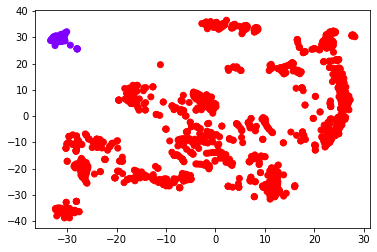

In [66]:
dbscan(tnse_all_x_repr,14)